# COGS 108 - Final Project 

# Overview

Sometimes people have to pick and choose what they have time to do. One way to pick is to look at online reviews, like Yelp's website. However, there can be false reviews or a person reposting a rating to boost a place's score. In this analysis, I compared the sentitment of the textual review to the numeric rating and these to the overall rating of the park to see if there were a significant difference. The difference in ratings was not significant; the overall numeric rating is a good representation of the textual reviews. 

# Name & GitHub ID

- Name: Kylie Morgan
- GitHub Username: Kylie-Morgan

# Research Question

Are the numeric Yelp review ratings a good representation of the sentitment of the textual review? 

## Background and Prior Work

Looking to the internet for reviews and reccomendations is nothing short of ordinary. But can you really trust sites like Yelp? 
"Georgios Zervas, coauthor of a recent study concluding that at least 16 percent of the reviews are fake" (Seligson 1). The articles continues to say that the majority of fake reviews are actually coming from restuarants. They want to counter any negative reviews to boost their rating score. Yelp and other online review sites work hard to combat this; one quarter of all reviews submit to Yelp aren't even published. Zervas doesn't have access to the methods of weeding out fake reviews, but his analysis leads him to belive Yelp does a pretty good job. 
Harvard Bussiness school conducted a similar analysis of whether or not consumer reviews are good for business. 

Jason Brown's piece spoke to the nature of ghost algorithms to deal with fake Yelp reviews. He suggests looking at the account data of the person posting the review: where else are they reviewing, what is their profile picture, and what kinds of photos have the uploaded? Since this data doesn't come with account information, I wasn't able to do this. In future projects about online reviews, I would try to include the reliability of the user. I could weight the ratings according to that. 
Post Modern marketing analyzed the reviews that are taken down. They came up with the biggest influence, other than the profile of the user, was pictures posted. The rating of the review had nothing to do with whether or not it was taken down. 

Both of these pieces talked about fake review to increase bussiness or benefit the owners. Parks and recreation, however does not gain money exclusively from people attending the park. Form my research proposal, I knew how they tracked the response to a park. The Human Kinetics Journal released a paper on making parks more appealing to low-income minority youth, as there is a trend in lower levels of physical activity. The study compared two unrenovated parks with two undergoing renovation. The findings show that park improvements had a significant impact on park use and local physical activity. I looked into the SanDiego Parks and Rec website and reddit accounts to see if there were any major complaints or changes. I came across the Park Design Manual and was able to get an idea of the reasoning behind the design of the parks; the department keeps sustainability, safety, accessibility, and amenities at the top of their list. The design of the park is meant to boost user experience. Towards the end of the manual there a section overviewing how parks are designed to decrease crime. I also found the budget, linked below. Neither of these documents mentioned increases in budget from online reviews. Towns do try and take into account community members opinion, but something as broad as Yelp reviews don't impact park budget. 



References (include links):


1) https://hbswk.hbs.edu/item/the-yelp-factor-are-consumer-reviews-good-for-business

2) http://www.bu.edu/articles/2013/yelp-reviews-can-you-trust-them/

3) https://www.brightlocal.com/learn/how-to-identify-and-deal-with-fake-yelp-reviews/

4) https://www.postmm.com/social-media-marketing/yelp-reviews-not-recommended-data-analysis/

5) Cohen, D. A., Han, B., Isacoff, J., Shulaker, B., Williamson, S., Marsh, T., ... & Bhatia, R. (2015). Impact of park renovations on park use and park-based physical activity. Journal of physical activity and health, 12(2), 289-295.

6) https://www.sdparks.org/content/dam/sdparks/en/pdf/Development/Park%20Design%20Manual.pdf
    budget- https://www.sandiego.gov/sites/default/files/fiscal_year_2020_parks_and_recreation_department_adopted_budget.pdf


# Hypothesis


H0: There's no difference between the ratings and the sentiment of the textual reviews

I think that the parks will have no difference between the ratings and the textual reviews. Since they are not bussiness, reviews don't affect the profit of the establishment. People usually only leave reviews after a really poitive or negative experience. I think the reviews will be fair and the ratings pretty similar because there is nothing to gain from lying about the review. 

# Dataset(s)

I am working with the Yelp reviews and locations data. The Yelp review datasets API only returns businesses with reviews, so if any of the parks don't have reviews they wouldn't be in the dataset. 
Yelp in it of itself is biased; people are more likely to write reviews after an extreme positive or negative experience. Because of this, the data is vaulnerable to outliars. 


(Copy this information for each dataset)
- Dataset Name: yelp_SD_parks.csv
- Link to the dataset: https://github.com/COGS108/individual_fa20/blob/master/data/yelp_SD_parks.csv
- Number of observations:833 rows × 10 columns
There's 818 unique parks. 833 rows because some of the parks ae mentioned multiple times. This dataset also shows address (including latitude and longitude), phone number, url, numeric rating, the number of reviews, Yelp ID, and whether or not the park is closed. There are 256 rows missing information, mostly phone numbers. 
- Dataset Name: yelp_SD_reviews.csv
- Link to the dataset:https://github.com/COGS108/individual_fa20/blob/master/data/yelp_SD_reviews.csv
- Number of observations:2333 rows × 3 columns
There's 818 unique parks. 2333 different text reviews with a numeric rating. There were several text reviews of some locations and less for others. This made analysis suseptible to outliars. Not all number of reviews from other data set are in this data set. I will do sentiment anaylis on the text and compare it to the numeric rating. 

I will combine these datasets to compare the ratings in the dataset with text analysis to the overall Yelp rating. 

# Setup

In [1]:
#made my imports
import seaborn as sns
sns.set()
sns.set_context('talk')

%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import nltk package 
#   PennTreeBank word tokenizer 
#   English language stopwords
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

import warnings
warnings.filterwarnings('ignore')

# scikit-learn imports
#   SVM (Support Vector Machine) classifer 
#   Vectorizer, which transforms text data into bag-of-words feature
#   TF-IDF Vectorizer that first removes widely used words in the dataset and then transforms test data
#   Metrics functions to evaluate performance
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import classification_report, precision_recall_fscore_support

In [2]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /home/kmmorgan/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/kmmorgan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
Yelp_reviews_df = pd.read_csv('yelp_SD_reviews.csv')
Yelp_parks_df = pd.read_csv('yelp_SD_parks.csv')

# Text Analysis

 First I wanted to test the accuracy of the numeric ratings to the text review. I completed tf-idf text analysis on the yelp_SD_reviews.csv data

In [4]:
#First I checked out the reviews data
Yelp_reviews_df.head(10)

,id,rating,text
0,Balboa Park,5,Balboa Park is a must see when coming to San D...
1,Balboa Park,5,Beautiful grounds even to take a stroll during...
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is..."
5,Civita Park,1,We love Civita Park for its wide open spaces t...
6,Waterfront Park,5,"After eating brunch in Little Italy, we decide..."
7,Waterfront Park,5,Definitely worth the price of admission.\n\nIf...
8,Waterfront Park,4,Well First I got here and I was quite amazed a...
9,Trolley Barn Park,5,What a beautiful and welcoming park! I have b...


In [5]:
#I doubled checked that all 818 parks were in the id column. I also check to make sure each park was rated and 
#there were no cells with null values
Yelp_reviews_df.isna().mean()
Yelp_reviews_df['id'].unique()
Yelp_reviews_df['rating'].unique()

array([5, 1, 4, 3, 2])

In [6]:
#Turn the rating into a positive or a negative- 0 or 1
def convert_rating(rating):

    if rating == 5:
        return 1.0
    elif rating == 4:
        return 1.0
    elif rating == 3:
        return 1.0
    elif rating == 2:
        return 0.0
    elif rating == 1:
        return 0.0
    else:
        return rating

In [7]:
#create a new column for these values
pos_neg = Yelp_reviews_df['rating'].apply(convert_rating)
Yelp_reviews_df['pos_neg'] = pos_neg
Yelp_reviews_df

,id,rating,text,pos_neg
0,Balboa Park,5,Balboa Park is a must see when coming to San D...,1.0
1,Balboa Park,5,Beautiful grounds even to take a stroll during...,1.0
2,Balboa Park,5,Beautiful sightseeing in San Diego. Lots of wa...,1.0
3,Civita Park,5,Was invited to child's B-Day party pre Covid-1...,1.0
4,Civita Park,5,"Pretty nice park, beautiful design. Anyone is...",1.0
...,...,...,...,...
2328,Petco Park,5,I have visited over 27 MLB Ballparks including...,1.0
2329,Ann D. L'Heureux Memorial Dog Park,4,No grass here but it's a great dog park. if yo...,1.0
2330,Ann D. L'Heureux Memorial Dog Park,3,"I love taking our cholate lab here, however, t...",1.0
2331,Ann D. L'Heureux Memorial Dog Park,3,Pretty small dog park overall. The center of t...,1.0


In [8]:
#convert text data into vector
tfidf = TfidfVectorizer( sublinear_tf = True, analyzer = 'word', max_features = 2000, tokenizer = word_tokenize)

In [9]:
#vectorize the reviews- review_tfidf_X = rating text vectorized
review_tfidf_X = tfidf.fit_transform(Yelp_reviews_df['text']).toarray()

In [10]:
# create new frame for pos/neg values
review_y = Yelp_reviews_df['pos_neg'].copy()

In [11]:
#split the data into train and test
num_training = int(.7 * len(Yelp_reviews_df))

In [12]:
review_train_tfidf_X = review_tfidf_X[:num_training]

review_test_tfidf_X = review_tfidf_X[num_training:]

review_train_tfidf_y = review_y[:num_training]

review_test_tfidf_y = review_y[num_training:]

In [13]:
# create svm
def train_SVM(X, y, kernel='linear'):

    clf = SVC(kernel = kernel)
    clf.fit(X, y)
    return clf

In [14]:
#train the data
review_tfidf_clf = train_SVM (review_train_tfidf_X, review_train_tfidf_y, kernel= 'linear')

In [15]:
pred_train_tfidf_y = review_tfidf_clf.predict(review_train_tfidf_X)
pred_test_tfidf_y = review_tfidf_clf.predict(review_test_tfidf_X)

In [16]:
print(classification_report(review_train_tfidf_y, pred_train_tfidf_y))
print(classification_report(review_test_tfidf_y, pred_test_tfidf_y))

              precision    recall  f1-score   support

         0.0       1.00      0.47      0.64       194
         1.0       0.93      1.00      0.97      1439

    accuracy                           0.94      1633
   macro avg       0.97      0.73      0.80      1633
weighted avg       0.94      0.94      0.93      1633

              precision    recall  f1-score   support

         0.0       0.60      0.04      0.07        78
         1.0       0.89      1.00      0.94       622

    accuracy                           0.89       700
   macro avg       0.75      0.52      0.51       700
weighted avg       0.86      0.89      0.84       700



From this, I see that the precision scores are pretty high. This means that the numeric ratings are a good indication of the text. From this, I now trust the numeric scores from the reviews dataset. I saw that the test precision score was lower, but I think that's just because the test dataset is small.
In the Parks data set, the review count is much higher than the reviews dataset. This means that some of these reviews have no text associated. These reviews are less trustworthy, so I won't be added them to the geospatial visualization.

# Data Combining and Analysis

Now I combined the cleaned the data from Yelp reviews and Yelp park locations

In [19]:
# Data frame one is from the parks dataset, and dataframe 2 is from the reviews data set (both from yelp)
df_1 = Yelp_parks_df[['name', 'address', 'rating', 'review_count', 'longitude', 'latitude']]
df_1['zip']= df_1['address'].str.extract(r'(\d{5}\-?\d{0,4})')
df_1

,name,address,rating,review_count,longitude,latitude,zip
0,Balboa Park,"1549 El Prado San Diego, CA 92101",5.0,2105,-117.153150,32.734502,92101
1,Civita Park,"7960 Civita Blvd San Diego, CA 92108",4.5,46,-117.147278,32.778315,92108
2,Waterfront Park,"1600 Pacific Hwy San Diego, CA 92101",4.5,242,-117.172479,32.721952,92101
3,Trolley Barn Park,"Adams Ave And Florida St San Diego, CA 92116",4.5,102,-117.143789,32.762463,92116
4,Bay View Park,"413 1st St Coronado, CA 92118",5.0,42,-117.178967,32.701785,92118
...,...,...,...,...,...,...,...
828,Del Cerro - San Diego,"San Diego, CA 92120",4.5,12,-117.073524,32.792626,92120
829,San Diego Metropolitan Transit System,"1255 Imperial Ave Ste 1000 San Diego, CA 92101",2.5,268,-117.153400,32.705760,92101
830,Petco Park,"100 Park Blvd San Diego, CA 92101",4.0,1667,-117.157054,32.707246,92101
831,Ann D. L'Heureux Memorial Dog Park,"2700 Carlsbad Village Dr Carlsbad, CA 92008",3.0,50,-117.316419,33.171137,92008


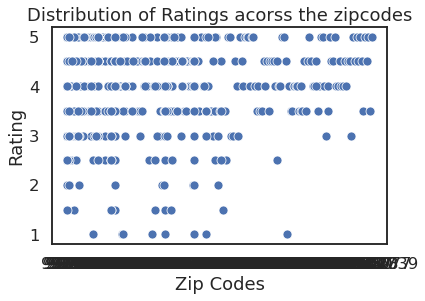

In [20]:
#graph zipcode and rating
sns.set_style("white")
z = df_1.groupby(df_1['zip'])
fig = sns.scatterplot(x = df_1['zip'], y = df_1['rating'])
plt.xlabel("Zip Codes")
plt.ylabel("Rating")
plt.title("Distribution of Ratings acorss the zipcodes") 
plt.show(fig)

There is not obvious clustering of ratings acorss the zipcodes. 

In [21]:
# The distribution of number of reviews per park
df_1['review_count'].describe()

count      833.000000
mean       201.246098
std        744.775857
min          1.000000
25%          6.000000
50%         22.000000
75%        109.000000
max      14195.000000
Name: review_count, dtype: float64

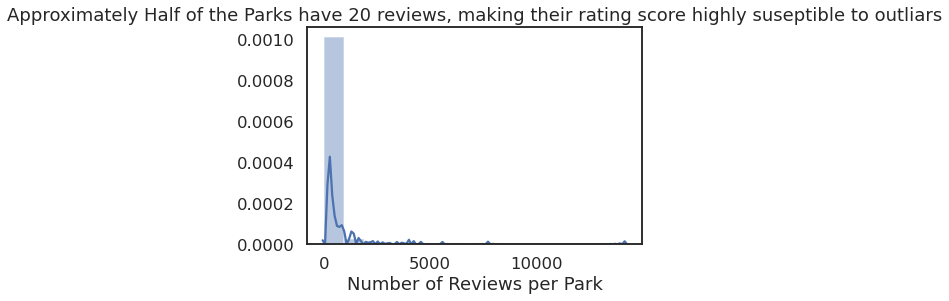

In [34]:
fig = sns.distplot(df_1['review_count'], kde = True, bins = 15)
plt.xlabel("Number of Reviews per Park")
plt.title("Approximately Half of the Parks have 20 reviews, making their rating score highly suseptible to outliars")
f1 = plt.gcf()

50% of the parks have 22 or less reviews. 75% have 110 or less. This means that the overall score is very suseptible to outliars. We know that none of the parks in the dataset have no reviews because of the Yelp API, but some do have only one review. This makes have text reviews more critical to backing the numeric score. 

In [22]:
# I remove irrelevant columns to just see the difference in rating between the overall score and the scores with text reviews
df_2 = Yelp_reviews_df[['id','rating']]

# Results

In [23]:
# I rename the columns in both dataframes and combined to make df
df_3 = df_2.rename(columns={"id": "name", "rating": "review_rating"})
df_3 = df_3.groupby(['name']).mean()
df_4 = df_1[['name', 'rating']]
df_4 = df_4.groupby(['name']).mean()
df = pd.concat([df_3, df_4], axis=1, sort=False)
# I add a new column to see the difference between the ratings in the two data frames
df = df.assign(rating_difference = (df['review_rating'] - df['rating']).abs())
df

,review_rating,rating,rating_difference
name,,,
13th & Market,2.666667,3.5,0.833333
1935 Cactus Garden,5.000000,5.0,0.000000
4S Patriot Park,4.333333,4.5,0.166667
4S Ranch Community Park,4.666667,5.0,0.333333
5 Star Dealer School,5.000000,5.0,0.000000
...,...,...,...
Windwood Park,3.666667,3.5,0.166667
Working Class,5.000000,4.5,0.500000
You & Yours Distilling Co,5.000000,5.0,0.000000


In [24]:
# I looked at the description of the rating differences
df['rating_difference'].describe()

count    818.000000
mean       0.388855
std        0.402921
min        0.000000
25%        0.000000
50%        0.333333
75%        0.500000
max        2.166667
Name: rating_difference, dtype: float64

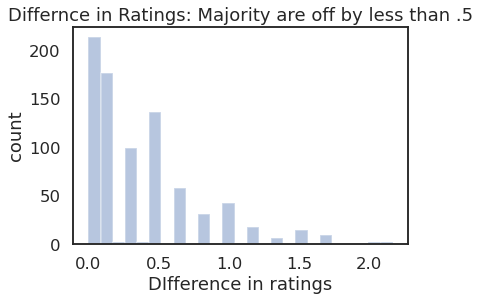

In [30]:
fig = sns.distplot(df['rating_difference'], kde = False, bins = 25)
plt.ylabel("count")
plt.xlabel("DIfference in ratings")
plt.title("Differnce in Ratings: Majority are off by less than .5")
f1 = plt.gcf()

The difference in ratings from both Yelp datasets is not significant. 

# Ethics & Privacy

The first issue I noticed was where the reviews dataset comes from: Yelp. People like to write reviews after extreme experiences: positive or negative. This poses the issue that you're not hearing the reviews of the overall population, but instead people with really great experiences or really aweful experiences. Yelp is also suseptible to fake reviews; people could just rate a place 5 over and over again on different accounts. This is why I first did tf-idf text analysis. I noticed that there were significantly less reviews in the review data frame than review_counts in the parks dataframe. 

Since the address do not correlate to individuals or reveal any personal information, I didn't need to employ the safe harbor method.The biggest take away is how suseptible this can be to outliars. In the future, I would gather more text reviews or double check the rating with the reliability of the account user. 

This was only an analysis on the reviews provided, so this does not generalize to all Yelp reviews/ratings. This could easily change with other data. 

# Conclusion & Discussion

Based on this analysis, there is a difference in the overall Yelp rating and the rating from the reviews dataset; however, the difference is not significant. This means the Yelp rating is a good representation of the sentiment of the textual reviews. 

Users can trust the Yelp rating. One limitation of the data is not having access to profiles of users who posted the review. I would love to weight each review by a "trustworthiness of user" score. 
